In [70]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [71]:
#importing the data

data = pd.read_csv('/Users/saptarshipal/Documents/data/pred_maint/data/ai4i2020.csv')
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [72]:
##checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [73]:
##checking for all the null values
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [74]:
##summary statistics of quantitative variables
data.describe().transpose()

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Machine failure          10000.0     0.03390     0.180981     0.0     0.00   
TWF                      10000.0     0.00460     0.067671     0.0     0.00   
HDF                      10000.0     0.01150     0.106625     0.0     0.00   
PWF                      10000.0     0.00950     0.097009     0.0     0.00   
OSF                      10000.0     0.00980     0.098514     0.0     0.00   
RNF                      10000.0     0.00190     0.043550     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Machine failure             0.0     0.00      1.0  
TWF                         0.0     0.00      1.0  
HDF                         0.0     0.00      1.0  
PWF                         0.0     0.00      1.0  
OSF                         0.0     0.00      1.0  
RNF                         0.0     0.00      1.0

In [75]:
#Checking unique values in the dataset

data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [76]:
#Checking for further description of the dataset using Profile report 

profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
#Dropping irrelevant Categorical column

data.drop(columns = ['UDI','Product ID'], axis = 1,inplace =True)
data.rename(columns = {'Air temperature [K]':'Air temperature','Process temperature [K]':'Process temperature','Rotational speed [rpm]':'Rotational speed','Torque [Nm]':'Torque','Tool wear [min]':'Tool wear'},inplace = True)


In [78]:
#Adding feature called "power"

data['power'] = data['Rotational speed'] * data['Torque']

In [79]:
#Descriptive statistics of numerical features

data_numeric = data.select_dtypes(include=[np.number])
#data_numeric.describe().transpose()

<AxesSubplot: >

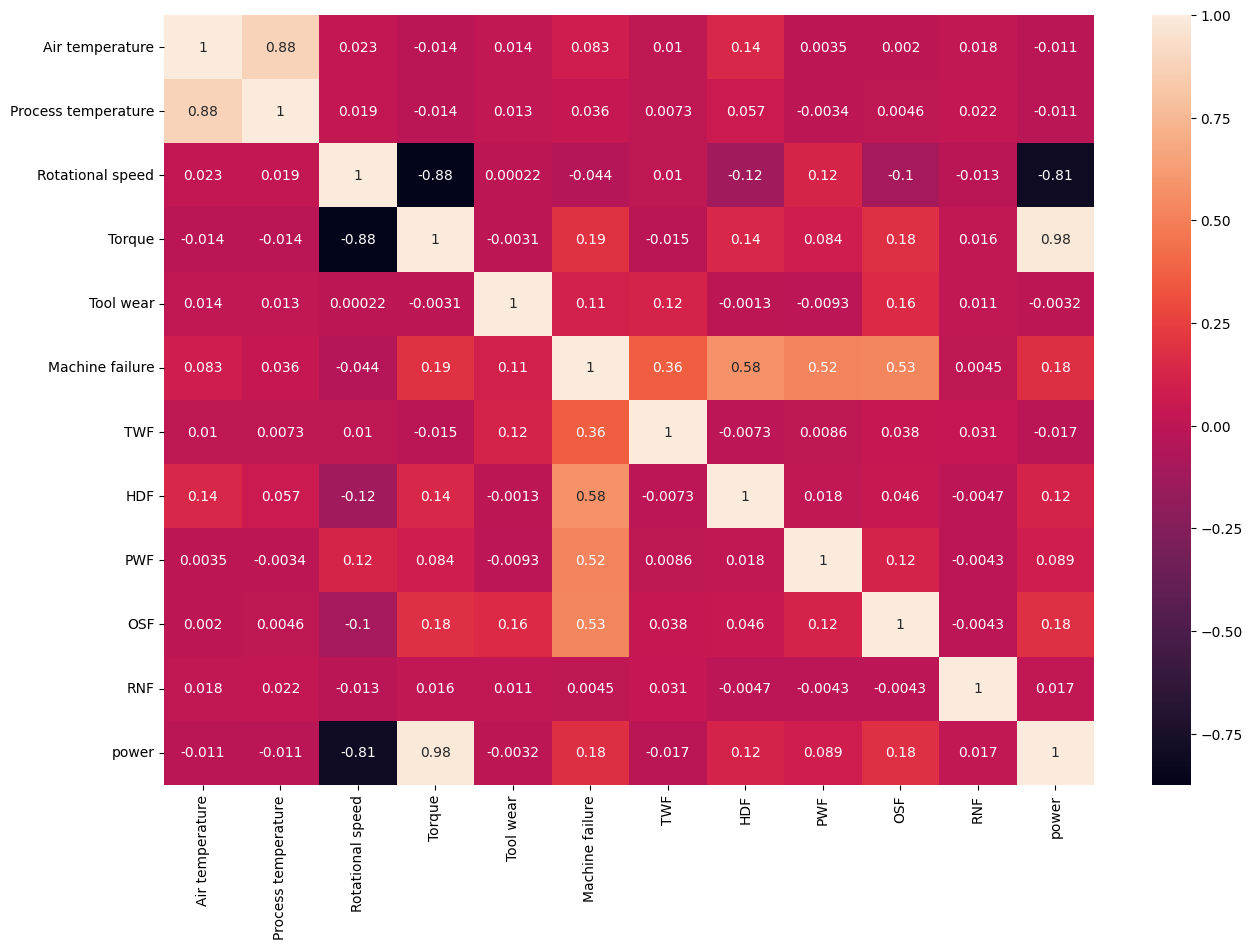

In [80]:
#Correlation of the numerical features

plt.subplots(figsize=(15, 10))
sns.heatmap(data_numeric.corr(),annot =True)

<AxesSubplot: >

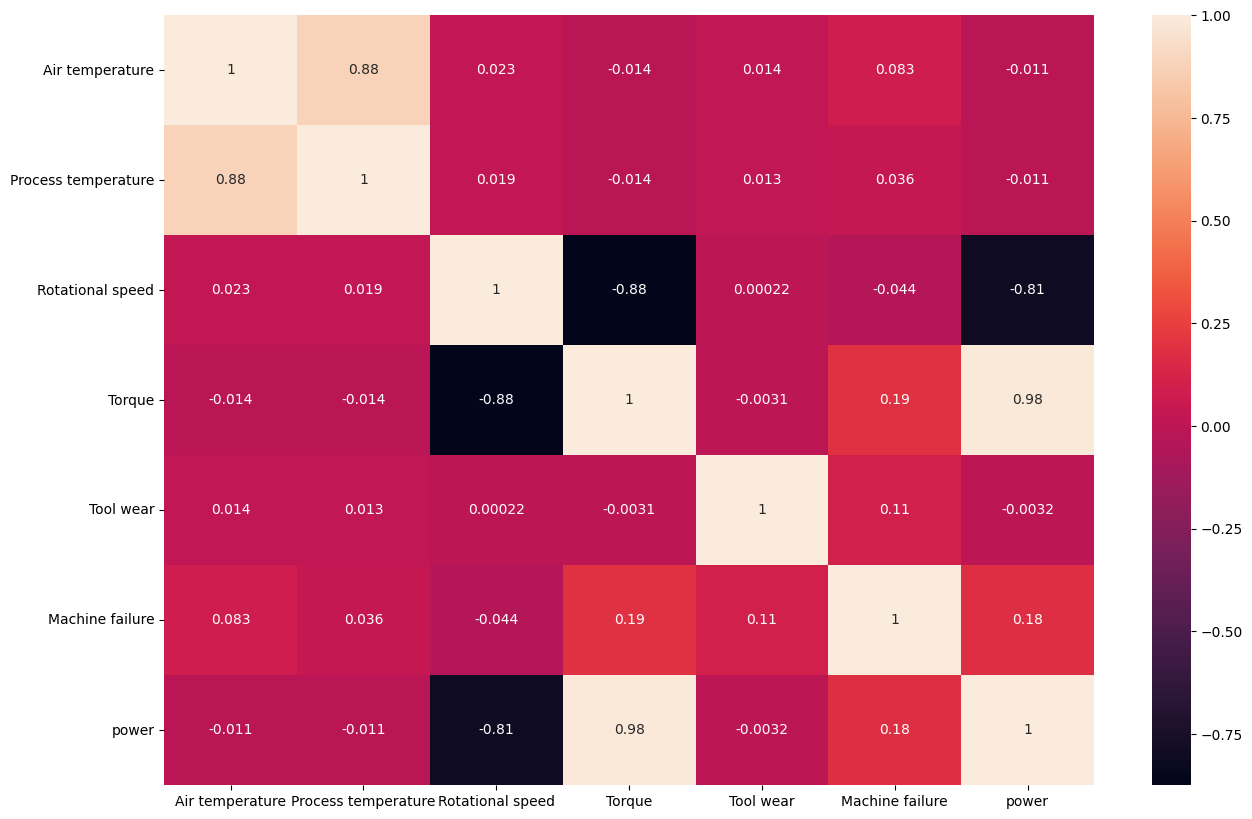

In [81]:
#Dropping unimpactful categorical features.

data.drop(columns = ['TWF', 'HDF', 'PWF', 'OSF','RNF'], axis = 1,inplace =True)

plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(),annot =True)

In [82]:
#Descriptive statistics of categorical features


data_categorical = data.select_dtypes(include=[np.object])
data_categorical.describe().transpose()

count unique top  freq
Type  10000      3   L  6000

## EDA

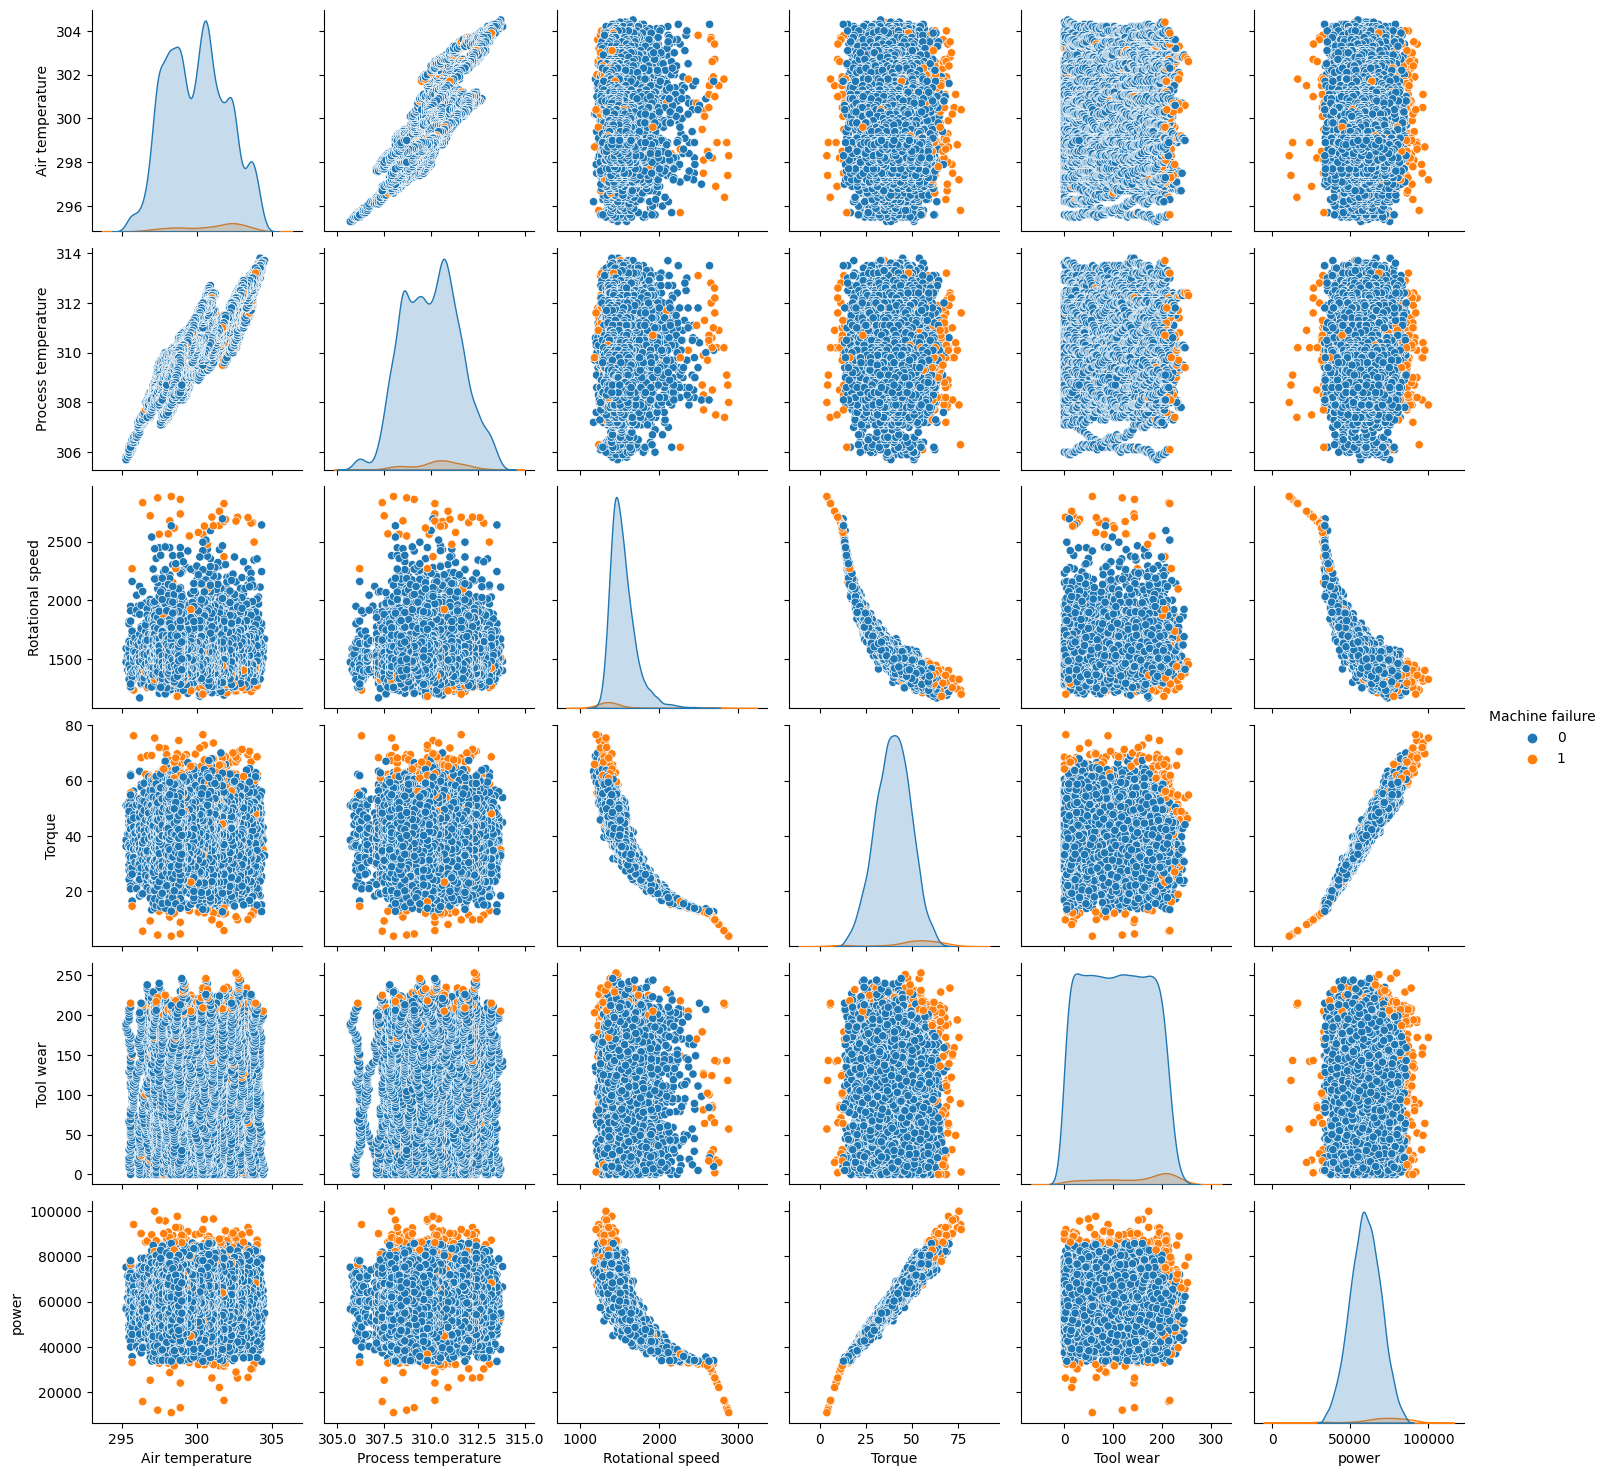

In [83]:
#Pairplot to see occurence of Machine failure as per different features 

sns.pairplot(data, hue ='Machine failure')
plt.show()

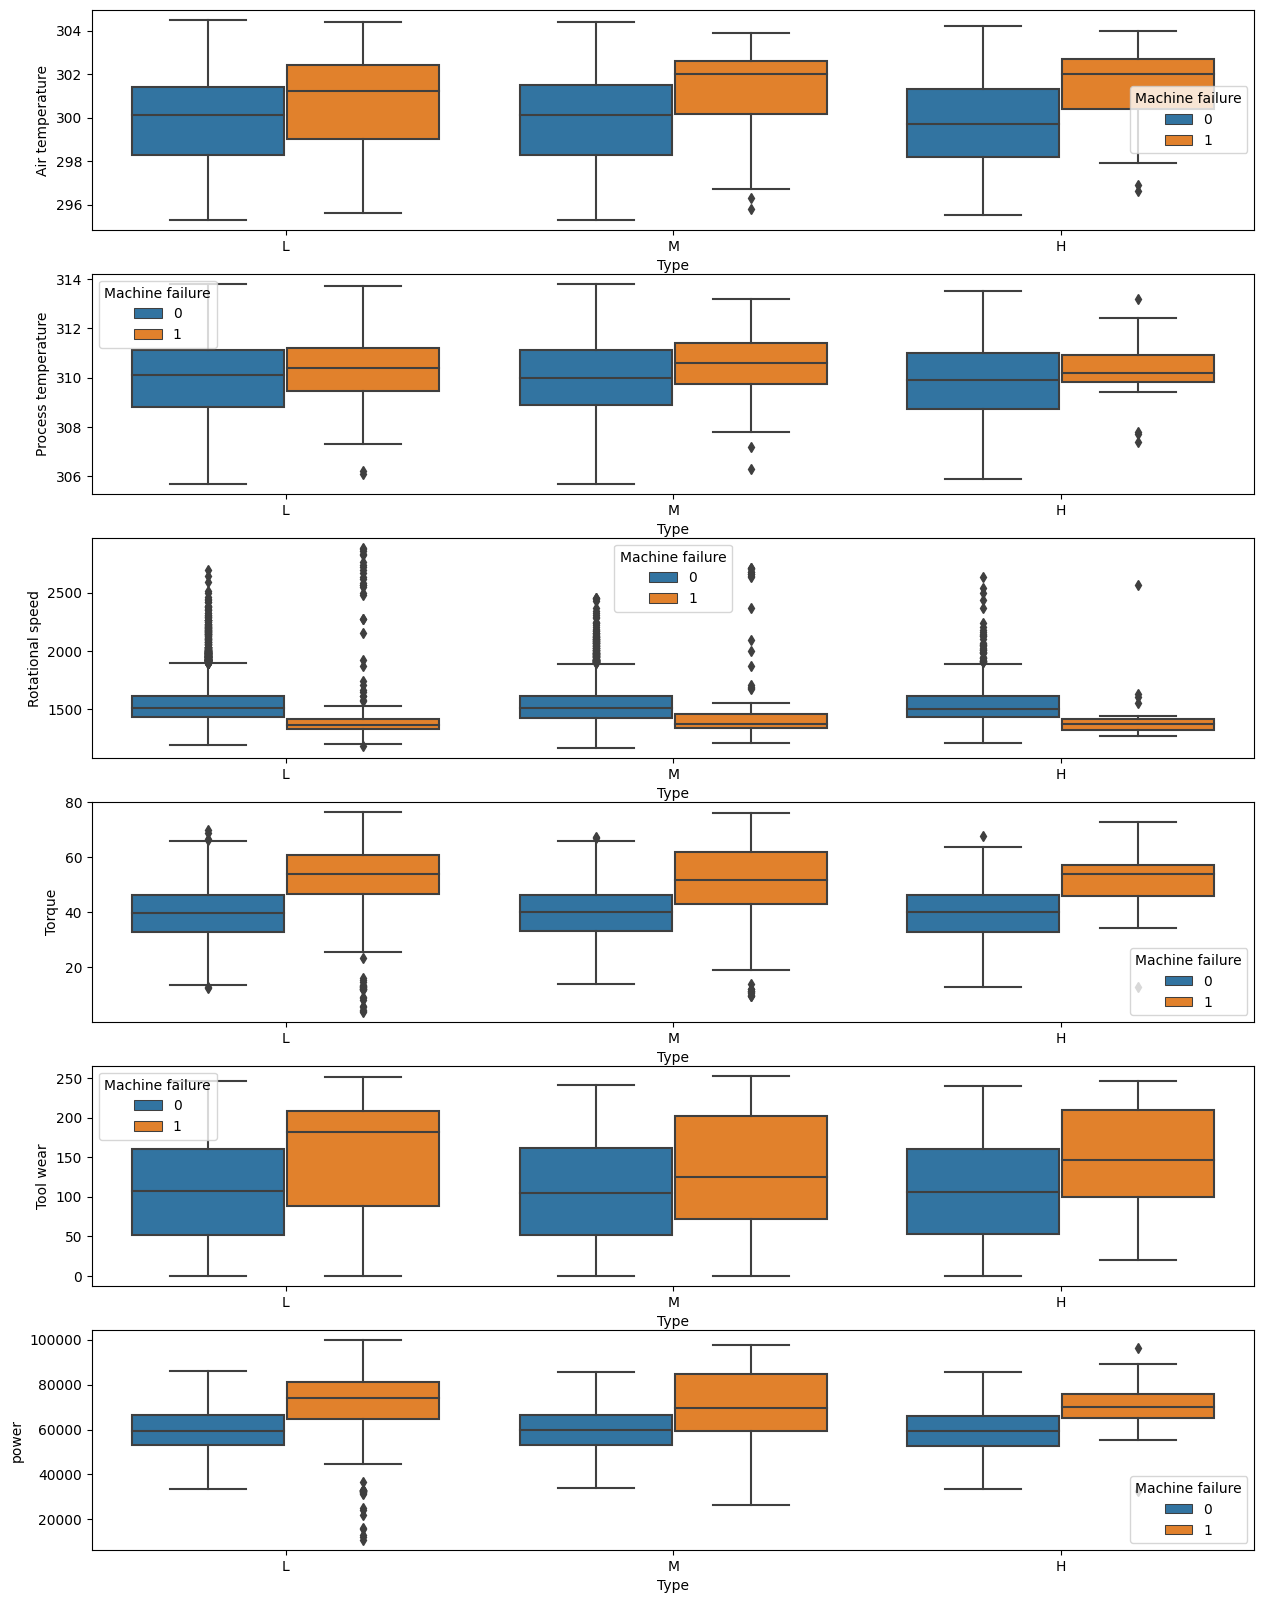

In [84]:
figure, axes = plt.subplots(6,1,figsize=(15, 20))

sns.boxplot(data = data,x = data['Type'],y =data['Air temperature'], hue = data['Machine failure'],order= ['L','M','H'],ax = axes[0])

sns.boxplot(data = data,x = data['Type'],y =data['Process temperature'], hue = data['Machine failure'],order= ['L','M','H'],ax = axes[1])

sns.boxplot(data = data,x = data['Type'],y =data['Rotational speed'], hue = data['Machine failure'],order= ['L','M','H'],ax = axes[2])

sns.boxplot(data = data,x = data['Type'],y =data['Torque'], hue = data['Machine failure'],order= ['L','M','H'],ax = axes[3])

sns.boxplot(data = data,x = data['Type'],y =data['Tool wear'], hue = data['Machine failure'],order= ['L','M','H'],ax = axes[4])

sns.boxplot(data = data,x = data['Type'],y =data['power'], hue = data['Machine failure'],order= ['L','M','H'],ax = axes[5])

plt.show()

In [85]:
#Analysis of Machine Failure as per product type

Total_products_type = data['Type'].value_counts()
Total_products_type_failure = data['Type'][data['Machine failure']==1].value_counts()
Product_type_failure_rate = Total_products_type_failure / Total_products_type

type_mf = pd.concat([Total_products_type,Total_products_type_failure,Product_type_failure_rate], axis= 1)
type_mf.columns = ['Total_products_type','Total_products_type_failure','Product_type_failure_rate']
type_mf

Total_products_type  Total_products_type_failure  Product_type_failure_rate
L                 6000                          235                   0.039167
M                 2997                           83                   0.027694
H                 1003                           21                   0.020937

In [87]:
data.describe()

Air temperature  Process temperature  Rotational speed        Torque  \
count     10000.000000         10000.000000      10000.000000  10000.000000   
mean        300.004930           310.005560       1538.776100     39.986910   
std           2.000259             1.483734        179.284096      9.968934   
min         295.300000           305.700000       1168.000000      3.800000   
25%         298.300000           308.800000       1423.000000     33.200000   
50%         300.100000           310.100000       1503.000000     40.100000   
75%         301.500000           311.100000       1612.000000     46.800000   
max         304.500000           313.800000       2886.000000     76.600000   

          Tool wear  Machine failure         power  
count  10000.000000     10000.000000  10000.000000  
mean     107.951000         0.033900  59967.147040  
std       63.654147         0.180981  10193.093881  
min        0.000000         0.000000  10966.800000  
25%       53.000000         0.000000  53105.400000  
50%      108.000000         0.000000  59883.900000  
75%      162.000000         0.000000  66873.750000  
max      253.000000         1.000000  99980.400000